In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#以下、STOの部分を任意の名前に変える。


#まず、Excelからデータを取り込み、Dataframe型にする。

df1 = pd.read_excel('Ni.xlsx',sheet_name='5Ksyuusei',index=None,header=None,)#Excelデータの取り込み。シートも指定できる。

In [55]:
from scipy import integrate

In [3]:
df1

,0,1,2,3,4,5
0,5min,do,mJ/s,20min,do,mJ/s
1,0.00383332,304.979,-0.0307883,0.00383332,304.929,0.0179886
2,0.00716665,304.975,-0.0294947,0.00716665,304.929,0.0189069
3,0.0105,304.975,-0.0280624,0.0105,304.932,0.0197719
4,0.0138333,304.976,-0.0265629,0.0138333,304.935,0.0206567
...,...,...,...,...,...,...
9247,30.8238,305.045,0.241447,NaN,NaN,NaN
9248,30.8272,305.045,0.241122,NaN,NaN,NaN
9249,30.8305,305.045,0.240786,NaN,NaN,NaN
9250,30.8338,305.045,0.240447,NaN,NaN,NaN


In [2]:
#Ni85mgのmol
n_Ni = 85/1000/59
n_Ni

0.001440677966101695

In [3]:
Ni = np.array(df1)
Ni.shape

(9252, 6)

In [4]:
Ni_5min = Ni[1:,0]
Ni_5sec = Ni_5min*60
Ni_20min = Ni[1:,3]
Ni_20sec = Ni_20min*60

In [5]:
Ni_5do = Ni[1:,1]
Ni_5k = Ni_5do+273
Ni_20do = Ni[1:,4]
Ni_20k = Ni_20do+273

In [6]:
Ni_5mw = Ni[1:,2]
Ni_5w = Ni_5mw/1000
Ni_20mw = Ni[1:,5]
Ni_20w = Ni_20mw/1000

In [7]:
Ni_5y = Ni_5w*12
Ni_20y = Ni_20w*3

In [8]:
T_0 = np.zeros(9251)

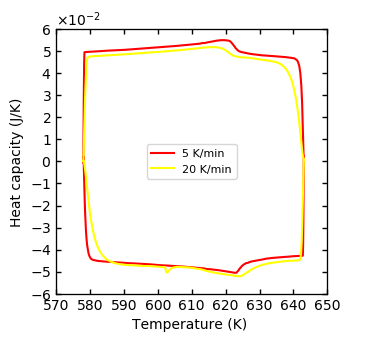

In [9]:
#熱容量の温度依存性の描画

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')


plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅

fig1 = plt.figure( figsize=(3.5, 3.5),dpi=100)#figureオブジェクトからインスタンスを作成。
ax = fig1.add_subplot(111)#subplotを作成。

ax.plot(Ni_5k,Ni_5y,color='red',linestyle='-',label='5 K/min')#透過率の描画。色、線の種類、凡例も設定可能
ax.plot(Ni_20k,Ni_20y,color='yellow',linestyle='-',label='20 K/min')#反射率の描画。色、線の種類、凡例も設定可能
#ax.plot(Ni_5k,T_0,color='black',linestyle='-',)#透過率の描画。色、線の種類、凡例も設定可能


ax.set_ylabel("Heat capacity (J/K)", {"fontsize":10})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Temperature (K) ", {"fontsize": 10})#縦軸のラベルと字の大きさ設定

ax.set_xlim([570,650])#第1軸x軸の範囲
ax.set_xticks([570,580,590,600,610,620,630,640,650])#第1軸x軸の主目盛り

ax.set_ylim([-0.05,0.05])#第1軸y軸の範囲
ax.set_yticks([-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06])#第1軸y軸の主目盛り

ax.set_ylabel("Heat capacity (J/K)", {"fontsize":10})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Temperature (K) ", {"fontsize": 10})#縦軸のラベルと字の大きさ設定

bx = ax.twinx()
by = ax.twiny() 
by.set_xlim([570,650])#第1軸x軸の範囲
by.set_xticks([570,580,590,600,610,620,630,640,650])#第1軸x軸の主目盛
bx.set_ylim([-0.05,0.05])#第1軸y軸の範囲
bx.set_yticks([-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06])#第1軸y軸の主


by.tick_params(labelcolor='None')
bx.tick_params(labelcolor='None')#第二軸の目盛りの数字を消す

from matplotlib.ticker import ScalarFormatter#以下の３文で軸を指数表記に。
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))



ax.legend(loc = 'center',prop={'size':8})#これがないと凡例が表示されない
plt.show()
#上側のグラフが降温過程、下側が昇温過程

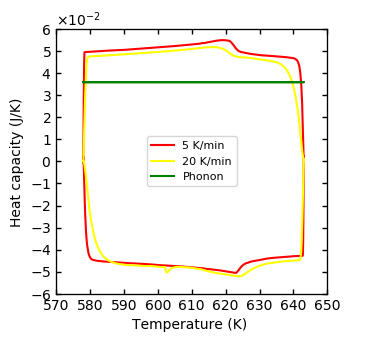

In [13]:
#熱容量の温度依存性とデュロンプティの法則

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')


plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅

fig1 = plt.figure( figsize=(3.5, 3.5),dpi=100)#figureオブジェクトからインスタンスを作成。
ax = fig1.add_subplot(111)#subplotを作成。

d = np.ones(9251)
D = 0.036 * d

ax.plot(Ni_5k,Ni_5y,color='red',linestyle='-',label='5 K/min')#透過率の描画。色、線の種類、凡例も設定可能
ax.plot(Ni_20k,Ni_20y,color='yellow',linestyle='-',label='20 K/min')#反射率の描画。色、線の種類、凡例も設定可能
#ax.plot(Ni_5k,T_0,color='black',linestyle='-',)#透過率の描画。色、線の種類、凡例も設定可能
ax.plot(Ni_5k,D,color='green',linestyle='-',label='Phonon')#透過率の描画。色、線の種類、凡例も設定可能

ax.set_ylabel("Heat capacity (J/K)", {"fontsize":10})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Temperature (K) ", {"fontsize": 10})#縦軸のラベルと字の大きさ設定

ax.set_xlim([570,650])#第1軸x軸の範囲
ax.set_xticks([570,580,590,600,610,620,630,640,650])#第1軸x軸の主目盛り

ax.set_ylim([-0.05,0.05])#第1軸y軸の範囲
ax.set_yticks([-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06])#第1軸y軸の主目盛り

ax.set_ylabel("Heat capacity (J/K)", {"fontsize":10})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Temperature (K) ", {"fontsize": 10})#縦軸のラベルと字の大きさ設定

bx = ax.twinx()
by = ax.twiny() 
by.set_xlim([570,650])#第1軸x軸の範囲
by.set_xticks([570,580,590,600,610,620,630,640,650])#第1軸x軸の主目盛
bx.set_ylim([-0.05,0.05])#第1軸y軸の範囲
bx.set_yticks([-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06])#第1軸y軸の主


by.tick_params(labelcolor='None')
bx.tick_params(labelcolor='None')#第二軸の目盛りの数字を消す

from matplotlib.ticker import ScalarFormatter#以下の３文で軸を指数表記に。
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))



ax.legend(loc = 'center',prop={'size':8})#これがないと凡例が表示されない
plt.show()
#上側のグラフが降温過程、下側が昇温過程

In [12]:
Ni_5k.shape

(9251,)

In [62]:
Ni_5k.min()

577.9752

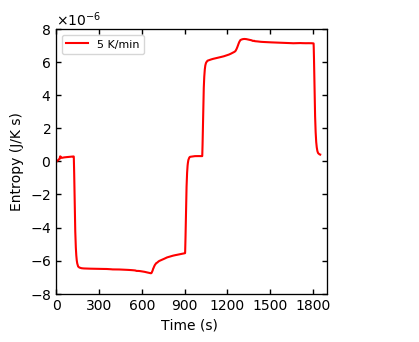

In [7]:
#エントロピーの時間変化

#データ作成
s_5k = Ni_5w/Ni_5k



plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')


plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅

fig1 = plt.figure( figsize=(3.5, 3.5),dpi=100)#figureオブジェクトからインスタンスを作成。
ax = fig1.add_subplot(111)#subplotを作成。

ax.plot(Ni_5sec,s_5k,color='red',linestyle='-',label='5 K/min')#透過率の描画。色、線の種類、凡例も設定可能

ax.set_ylabel("Entropy (J/K s)", {"fontsize":10})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Time (s) ", {"fontsize": 10})#縦軸のラベルと字の大きさ設定

ax.set_xlim([0,1900])#第1軸x軸の範囲
ax.set_xticks([0,300,600,900,1200,1500,1800])#第1軸x軸の主目盛り

ax.set_ylim([-0.000008,0.000008])#第1軸y軸の範囲
ax.set_yticks([-0.000008,-0.000006,-0.000004,-0.000002,0,0.000002,0.000004,0.000006,0.000008])#第1軸y軸の主目盛り

bx = ax.twinx()
by = ax.twiny() 
by.set_xlim([0,1900])#第1軸x軸の範囲
by.set_xticks([0,300,600,900,1200,1500,1800])#第1軸x軸
bx.set_ylim([-0.000008,0.000008])#第1軸y軸の範囲
bx.set_yticks([-0.000008,-0.000006,-0.000004,-0.000002,0,0.000002,0.000004,0.000006,0.000008])#第1軸y軸の


by.tick_params(labelcolor='None')
bx.tick_params(labelcolor='None')#第二軸の目盛りの数字を消す

from matplotlib.ticker import ScalarFormatter#以下の３文で軸を指数表記に。
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

            
ax.legend(loc = 'upper left',prop={'size':8})#これがないと凡例が表示されない
plt.show()

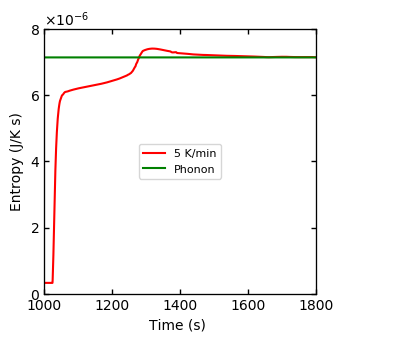

In [8]:
#エントロピーの時間変化

#データ作成
#s_5k = Ni_5w/Ni_5k

#fonon
f = np.ones(9251)
fonon =  0.00000715*f

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')


plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅

fig1 = plt.figure( figsize=(3.5, 3.5),dpi=100)#figureオブジェクトからインスタンスを作成。
ax = fig1.add_subplot(111)#subplotを作成。

ax.plot(Ni_5sec,s_5k,color='red',linestyle='-',label='5 K/min')#透過率の描画。色、線の種類、凡例も設定可能
ax.plot(Ni_5sec,fonon,color='green',linestyle='-',label='Phonon')#透過率の描画。色、線の種類、凡例も設定可能


ax.set_ylabel("Entropy (J/K s)", {"fontsize":10})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Time (s) ", {"fontsize": 10})#縦軸のラベルと字の大きさ設定

ax.set_xlim([1000,1800])#第1軸x軸の範囲
ax.set_xticks([1000,1200,1400,1600,1800])#第1軸x軸の主目盛り

ax.set_ylim([0,0.000007])#第1軸y軸の範囲
ax.set_yticks([0,0.000002,0.000004,0.000006,0.000008])#第1軸y軸の主目盛り

bx = ax.twinx()
by = ax.twiny() 
by.set_xlim([1000,1800])#第1軸x軸の範囲
by.set_xticks([1000,1200,1400,1600,1800])#第1軸x軸の主目盛り
bx.set_ylim([0,0.000007])#第1軸y軸の範囲
bx.set_yticks([0,0.000002,0.000004,0.000006,0.000008])#第1軸y軸の


by.tick_params(labelcolor='None')
bx.tick_params(labelcolor='None')#第二軸の目盛りの数字を消す

from matplotlib.ticker import ScalarFormatter#以下の３文で軸を指数表記に。
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))


            
ax.legend(loc = 'center',prop={'size':8})#これがないと凡例が表示されない
plt.show()
#下の図は降温領域のエントロピー変化

In [42]:
#以下格子比熱の影響を求める
np.where(Ni_5sec > 1800)
Ni_5sec[9000]

1800.2298

In [41]:
s_5k[9000]

7.155508502622791e-06

In [43]:
#entropy_Max
s_5k.max()

7.417747193163066e-06

In [47]:
np.where(s_5k > 0.0000071555)

(array([6397, 6398, 6399, ..., 8998, 8999, 9000], dtype=int64),)

In [48]:
s_spin = s_5k - 0.00000715
s_spin

array([-7.2032688200544245e-06, -7.201031013095372e-06,
       -7.198552982896152e-06, ..., -6.73344733833779e-06,
       -6.7340342879879595e-06, -6.73461688569836e-06], dtype=object)

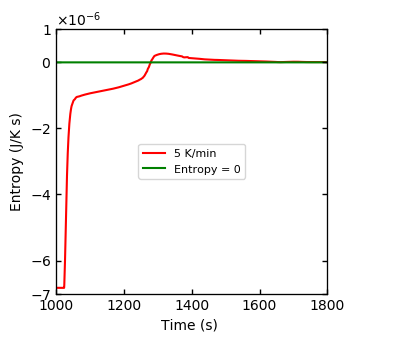

In [76]:
#エントロピーの時間変化

#データ作成
#s_5k = Ni_5w/Ni_5k

y = np.zeros(9251)

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')


plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅

fig1 = plt.figure( figsize=(3.5, 3.5),dpi=100)#figureオブジェクトからインスタンスを作成。
ax = fig1.add_subplot(111)#subplotを作成。

ax.plot(Ni_5sec,s_spin,color='red',linestyle='-',label='5 K/min')#透過率の描画。色、線の種類、凡例も設定可能
ax.plot(Ni_5sec,y,color='green',linestyle='-',label='Entropy = 0')#透過率の描画。色、線の種類、凡例も設定可

ax.set_ylabel("Entropy (J/K s)", {"fontsize":10})#横軸のラベルと字の大きさ設定
ax.set_xlabel("Time (s) ", {"fontsize": 10})#縦軸のラベルと字の大きさ設定

ax.set_xlim([1000,1800])#第1軸x軸の範囲
ax.set_xticks([1000,1200,1400,1600,1800])#第1軸x軸の主目盛り

ax.set_ylim([-0.000007,0.000001])#第1軸y軸の範囲
ax.set_yticks([-0.000007,-0.000006,-0.000004,-0.000002,0,0.000001])#第1軸y軸の主目盛り

bx = ax.twinx()
by = ax.twiny() 
bx.set_ylim([-0.000007,0.000001])#第1軸y軸の範囲
bx.set_yticks([-0.000007,-0.000006,-0.000004,-0.000002,0,0.000001])#第1軸y軸の主目盛り

by.set_xlim([1000,1800])#第1軸x軸の範囲
by.set_xticks([1000,1200,1400,1600,1800])#第1軸x軸の主目盛り



by.tick_params(labelcolor='None')
bx.tick_params(labelcolor='None')#第二軸の目盛りの数字を消す

from matplotlib.ticker import ScalarFormatter#以下の３文で軸を指数表記に。
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))


            
ax.legend(loc = 'center',prop={'size':8})#これがないと凡例が表示されない
plt.show()
#下の図は降温領域のエントロピー変化

In [50]:
np.where(s_spin > 0)

(array([6396, 6397, 6398, ..., 9015, 9016, 9017], dtype=int64),)

In [54]:
s_spin[9017]

4.1761319872141695e-09

In [57]:
entropy = integrate.simps(s_spin[6396:9017],Ni_5sec[6396:9017] )
entropy_mol = entropy/n_Ni
entropy_mol
#降温過程の相転移におけるスピンの1molあたりのエントロピー変化量

0.02848989731782723